In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data_full_5sekres.xlsx')

In [53]:
df1 = df.copy()

In [54]:
#Create a column of load profile
df1['Load'] = df1['thrusterAndPropulsion']
df1['BaseLoad'] = 300
df1.loc[df1['operationId'] == 6, 'BaseLoad'] = 0
df1.loc[df1['operationId'] == 1, 'BaseLoad'] = 0
df1['Load'] = df1['thrusterAndPropulsion'] + df1['BaseLoad']

df1['Battery'] = 0
df1['SOC'] = 0
#Create dataset with only relevant columns
df3 = df1[['datetime', 'Load', 'engMdoPower_0_','engMdoPower_1_','engMdoPower_2_', 'engMdoPower_3_', 'operationId', 'dpMode', 'BaseLoad', 'Battery', 'SOC']]

#Set engine powers to zero
num = df3['engMdoPower_0_']._get_numeric_data()
num[num != 0] = 0

num = df3['engMdoPower_1_']._get_numeric_data()
num[num != 0] = 0

num = df3['engMdoPower_2_']._get_numeric_data()
num[num != 0] = 0

num = df3['engMdoPower_3_']._get_numeric_data()
num[num != 0] = 0


display(df3)

,datetime,Load,engMdoPower_0_,engMdoPower_1_,engMdoPower_2_,engMdoPower_3_,operationId,dpMode,BaseLoad,Battery,SOC
0,2020-01-30 00:00:00,0.0,0.0,0.0,0,0.0,6.0,0.0,0,0,0
1,2020-01-30 00:00:05,0.0,0.0,0.0,0,0.0,6.0,0.0,0,0,0
2,2020-01-30 00:00:10,0.0,0.0,0.0,0,0.0,6.0,0.0,0,0,0
3,2020-01-30 00:00:15,0.0,0.0,0.0,0,0.0,6.0,0.0,0,0,0
4,2020-01-30 00:00:20,0.0,0.0,0.0,0,0.0,6.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
120955,2020-02-05 23:59:35,1796.0,0.0,0.0,0,0.0,3.0,0.0,300,0,0
120956,2020-02-05 23:59:40,1743.2,0.0,0.0,0,0.0,3.0,0.0,300,0,0
120957,2020-02-05 23:59:45,1725.6,0.0,0.0,0,0.0,3.0,0.0,300,0,0
120958,2020-02-05 23:59:50,1760.8,0.0,0.0,0,0.0,3.0,0.0,300,0,0


# Find where offshore charging points are

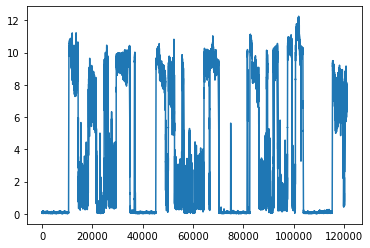

In [55]:
x = df.index
y = df['speedOverGround']
y1 = df['operationId']
plt.plot(x,y)
#plt.plot(x,y1)

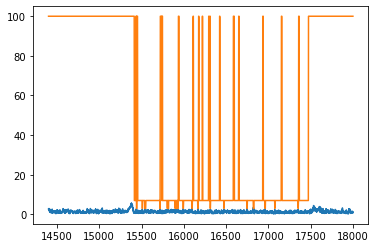

In [56]:
x = df.index
y = df['speedOverGround']
y1 = df['operationId']
y2 = df['dpMode']

x = x[14400:18000]
y = y[14400:18000]
y1 = y1[14400:18000]
y2 = y2[14400:18000]
plt.plot(x,y)
plt.plot(x,y1)

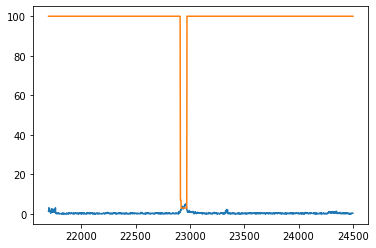

In [57]:
x = df.index
y = df['speedOverGround']
y1 = df['operationId']
y2 = df['dpMode']

x = x[21700:24500]
y = y[21700:24500]
y1 = y1[21700:24500]
y2 = y2[21700:24500]
plt.plot(x,y)
plt.plot(x,y1)

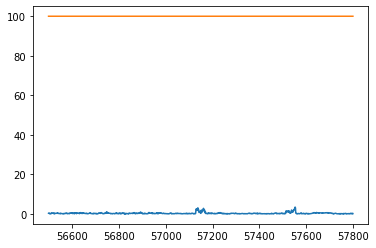

In [58]:
x = df.index
y = df['speedOverGround']
y1 = df['operationId']
y2 = df['dpMode']

x = x[56500:57800]
y = y[56500:57800]
y1 = y1[56500:57800]
y2 = y2[56500:57800]
plt.plot(x,y)
plt.plot(x,y1)

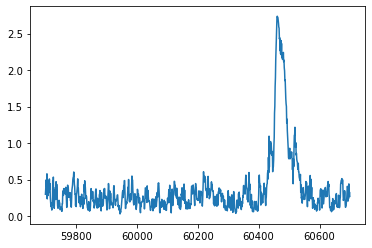

In [59]:
x = df.index
y = df['speedOverGround']
y1 = df['operationId']
y2 = df['dpMode']

x = x[59700:60700]
y = y[59700:60700]
y1 = y1[59700:60700]
y2 = y2[59700:60700]
plt.plot(x,y)
#plt.plot(x,y1)

# Peakshaving i overgang fra 1 til 2 generatorer

Offshore dock

In [60]:
df5 = df3.copy()

load = df5['Load'].values
dg0 = df5['engMdoPower_0_'].values
dg1 = df5['engMdoPower_1_'].values
dg2 = df5['engMdoPower_2_'].values
dg3 = df5['engMdoPower_3_'].values
bat = df5['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df5['operationId'].values
shore = [0]*120960
opid[15400:17500] = 6
opid[21700:24500] = 6
opid[56500:57800] = 6
opid[59700:60700] = 6


# DP mode, battery is used for spinning reserve 
for i in range(len(load)):
    if i == 120959:
        pass 
    
    elif opid[i] == 100:
        
        if load[i] <= 2100 and soc[i] >= 310:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and soc[i] < 310:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
            
        elif load[i] > 2100 and soc[i] >= 310:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 2100 and soc[i] < 310:
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
            soc[i+1] = soc[i]         

        else:
            soc[i+1] = soc[i]

#Transit mode
    elif opid[i] == 3 or opid[i] == 5:
        if load[i] < 500 and soc[i] > 124:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720 
        elif load[i] <= 2100 and load[i] > 500:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i] <= 3000 and soc[i] > 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif load[i] > 2100 and load[i] <= 3000 and soc[i] <= 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 3000: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
        
#Standby mode
    elif opid[i] == 7:
        if load[i] < 500 and soc[i] > 124:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720 
        elif load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i] <= 3000 and soc[i] > 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif load[i] > 2100 and load[i] <= 3000 and soc[i] <= 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 3000: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
            
# port
    elif opid[i] == 1 and soc[i] < 496:
        dg0[i] = load[i]# - bat[i]*1.08
        soc[i+1] = soc[i]# - bat[i]/720
    elif opid[i] == 1 and soc[i] >= 496:
        dg0[i] = load[i]
        soc[i+1] = soc[i]    
    elif opid[i] == 6 and soc[i] < 496:
        bat[i] = -50
        shore[i] = load[i] - bat[i]*1.08
        soc[i+1] = soc[i] - bat[i]/720
    elif opid[i] == 6 and soc[i] >= 496:
        shore[i] = load[i]
        soc[i+1] = soc[i] 
    else:
        soc[i+1] = soc[i]
        dg0[i] = load[i]


In [51]:
# Normalize Generators
dg0n = (dg0-dg0.min()) / (2100 - dg0.min())
dg1n = (dg1-dg1.min()) / (2100 - dg1.min())
dg2n = (dg2-dg2.min()) / (2100 - dg2.min())
dg3n = (dg3-dg3.min()) / (2100 - dg3.min())

fc_dg0 = np.zeros(120960)
fc_dg1 = np.zeros(120960)
fc_dg2 = np.zeros(120960)
fc_dg3 = np.zeros(120960)

for i in range(len(dg0)):
    if dg0[i] == 0:
        fc_dg0[i] = 0
    else:
        fc_dg0[i] = (445*dg0n[i] + 47)/720
        
for i in range(len(dg1)):
    if dg1[i] == 0:
        fc_dg1[i] = 0
    else:
        fc_dg1[i] = (445*dg1n[i] + 47)/720
        
for i in range(len(dg2)):
    if dg2[i] == 0:
        fc_dg2[i] = 0
    else:
        fc_dg2[i] = (445*dg2n[i] + 47)/720
        
for i in range(len(dg3)):
    if dg3[i] == 0:
        fc_dg3[i] = 0
    else:
        fc_dg3[i] = (445*dg3n[i] + 47)/720
        
fc = sum(fc_dg0) + sum(fc_dg1) + sum(fc_dg2) + sum(fc_dg3)
print('Total fuel consumption of CASE 2 batteri mellom 1-2 gen: ', fc, 'liter')

Total fuel consumption of CASE 2 batteri mellom 1-2 gen:  31963.50604122282 liter


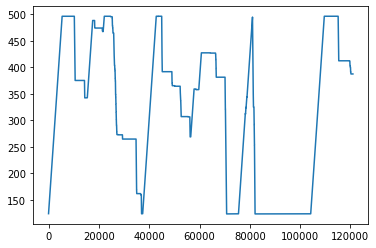

In [52]:
plt.plot(soc)

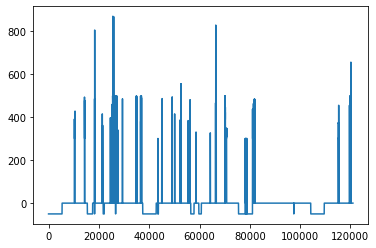

In [49]:
plt.plot(bat)

# GØNNNE BATTERI SOM FAEN!

In [73]:
df6 = df3.copy()

load = df6['Load'].values
dg0 = df6['engMdoPower_0_'].values
dg1 = df6['engMdoPower_1_'].values
dg2 = df6['engMdoPower_2_'].values
dg3 = df6['engMdoPower_3_'].values
bat = df6['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df6['operationId'].values
shore = [0]*120960
opid[15400:17500] = 6
opid[21700:24500] = 6
opid[56500:57800] = 6
opid[59700:60700] = 6

# DP mode, battery is used for spinning reserve 
for i in range(len(load)):
    if i == 120959:
        pass
    
    # DP-mode
    elif opid[i] == 100:
        
        if load[i] <= 2100 and soc[i] >= 200:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
            
        elif load[i] > 2100 and soc[i] >= 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
            soc[i+1] = soc[i]         

        else:
            soc[i+1] = soc[i]
        
#Transit mode
    elif opid[i] == 3 or opid[i] == 5:
        if soc[i] > 124 and load[i] <= 1000:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 1000 and load[i] <= 3100:
            bat[i] = 1000
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 3100:
            bat[i] = 1000
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
        
# Standby mode
    elif opid[i] == 7:
        if soc[i] > 124 and load[i] <= 1000:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 1000 and load[i] <= 3100:
            bat[i] = 1000
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 3100:
            bat[i] = 1000
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
            
#Port
    elif opid[i] == 1:
        if soc[i] > 124 and load[i] <= 1000:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 1000 and load[i] <= 3100:
            bat[i] = 1000
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 3100:
            bat[i] = 1000
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
    elif opid[i] == 6:
        if soc[i] < 496:
            bat[i] = -100
            soc[i+1] = soc[i] - bat[i]/720
            shore[i] = load[i] - bat[i]
        elif soc[i] >= 496:
            shore[i] = load[i]
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
    else:
        soc[i+1] = soc[i]
        dg0[i] = load[i]

In [74]:
# Normalize Generators
dg0n = (dg0-dg0.min()) / (2100 - dg0.min())
dg1n = (dg1-dg1.min()) / (2100 - dg1.min())
dg2n = (dg2-dg2.min()) / (2100 - dg2.min())
dg3n = (dg3-dg3.min()) / (2100 - dg3.min())

fc_dg0 = np.zeros(120960)
fc_dg1 = np.zeros(120960)
fc_dg2 = np.zeros(120960)
fc_dg3 = np.zeros(120960)

for i in range(len(dg0)):
    if dg0[i] == 0:
        fc_dg0[i] = 0
    else:
        fc_dg0[i] = (445*dg0n[i] + 47)/720
        
for i in range(len(dg1)):
    if dg1[i] == 0:
        fc_dg1[i] = 0
    else:
        fc_dg1[i] = (445*dg1n[i] + 47)/720
        
for i in range(len(dg2)):
    if dg2[i] == 0:
        fc_dg2[i] = 0
    else:
        fc_dg2[i] = (445*dg2n[i] + 47)/720
        
for i in range(len(dg3)):
    if dg3[i] == 0:
        fc_dg3[i] = 0
    else:
        fc_dg3[i] = (445*dg3n[i] + 47)/720
        
fc = sum(fc_dg0) + sum(fc_dg1) + sum(fc_dg2) + sum(fc_dg3)
print('Total fuel consumption of CASE 2 batteri Gønne batteri 1000: ', fc, 'liter')

Total fuel consumption of CASE 2 batteri Gønne batteri 1000:  32243.212567790797 liter


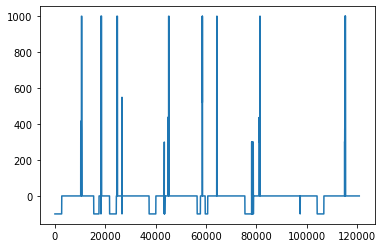

In [75]:
plt.plot(bat)

# Gønner batteri 100 kw

In [67]:
df7 = df3.copy()

load = df7['Load'].values
dg0 = df7['engMdoPower_0_'].values
dg1 = df7['engMdoPower_1_'].values
dg2 = df7['engMdoPower_2_'].values
dg3 = df7['engMdoPower_3_'].values
bat = df7['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df7['operationId'].values
shore = [0]*120960
opid[15400:17500] = 6
opid[21700:24500] = 6
opid[56500:57800] = 6
opid[59700:60700] = 6

# DP mode, battery is used for spinning reserve 
for i in range(len(load)):
    if i == 120959:
        pass
    
    # DP-mode
    elif opid[i] == 100:
        
        if load[i] <= 2100 and soc[i] >= 200:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
            
        elif load[i] > 2100 and soc[i] >= 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
            soc[i+1] = soc[i]         

        else:
            soc[i+1] = soc[i]
        
#Transit mode
    elif opid[i] == 3 or opid[i] == 5:
        if soc[i] > 124 and load[i] <= 2200:
            bat[i] = 100
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 2200 and load[i] < 4300:
            bat[i] = 100
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
        
# Standby mode
    elif opid[i] == 7:
        if soc[i] > 124 and load[i] <= 2200:
            bat[i] = 100
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 2200 and load[i] < 4300:
            bat[i] = 100
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
#Port
    elif opid[i] == 1:
        if soc[i] > 124 and load[i] <= 2200:
            bat[i] = 100
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 2200 and load[i] < 4300:
            bat[i] = 100
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
    elif opid[i] == 6:
        if soc[i] < 496:
            bat[i] = -100
            soc[i+1] = soc[i] - bat[i]/720
            shore[i] = load[i] - bat[i]
        elif soc[i] >= 496:
            shore[i] = load[i]
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
    else:
        soc[i+1] = soc[i]
        dg0[i] = load[i]

In [68]:
# Normalize Generators
dg0n = (dg0-dg0.min()) / (2100 - dg0.min())
dg1n = (dg1-dg1.min()) / (2100 - dg1.min())
dg2n = (dg2-dg2.min()) / (2100 - dg2.min())
dg3n = (dg3-dg3.min()) / (2100 - dg3.min())

fc_dg0 = np.zeros(120960)
fc_dg1 = np.zeros(120960)
fc_dg2 = np.zeros(120960)
fc_dg3 = np.zeros(120960)

for i in range(len(dg0)):
    if dg0[i] == 0:
        fc_dg0[i] = 0
    else:
        fc_dg0[i] = (445*dg0n[i] + 47)/720
        
for i in range(len(dg1)):
    if dg1[i] == 0:
        fc_dg1[i] = 0
    else:
        fc_dg1[i] = (445*dg1n[i] + 47)/720
        
for i in range(len(dg2)):
    if dg2[i] == 0:
        fc_dg2[i] = 0
    else:
        fc_dg2[i] = (445*dg2n[i] + 47)/720
        
for i in range(len(dg3)):
    if dg3[i] == 0:
        fc_dg3[i] = 0
    else:
        fc_dg3[i] = (445*dg3n[i] + 47)/720
        
fc = sum(fc_dg0) + sum(fc_dg1) + sum(fc_dg2) + sum(fc_dg3)
print('Total fuel consumption of CASE 2 batteri Gønne batteri 100: ', fc, 'liter')

Total fuel consumption of CASE 2 batteri Gønne batteri 100:  33421.777785728686 liter


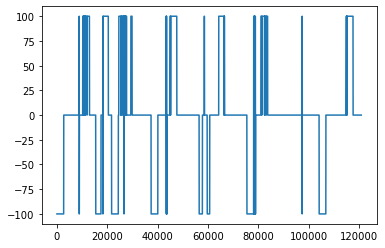

In [69]:
plt.plot(bat)